In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew
import statsmodels.api as sm

# data_location = "C:/Users/Usuario/Desktop/DIGITAL_HOUSE/data_properatti.csv"
data_location = 'C:/Users/Usuario/Desktop/PROPERTTI_CABA_NORTE.xls'
df = pd.read_excel(data_location)


# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 16
df.head(3)

,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,...,M2,PRECIO_USD_POR_M2,TIENE_PILETA,TIENE_PATIO,TIENE_AMMENITIES,ambientes,expensas,PRECIO_USD_POR_M2mean,PRECIO_ARS,PRECIO_M2
0,apartment,Barrio_x0020_Norte,_x007C_Argentina_x007C_Capital_x0020_Federal_x...,Capital_x0020_Federal,-34.624170,-58.379565,712440.0,ARS,705008.05,39956.25,...,30.0,118.733333,1,1,1,1.0,NaN,3060.970696,39167.113889,1305.570463
1,apartment,Barrio_x0020_Norte,_x007C_Argentina_x007C_Capital_x0020_Federal_x...,Capital_x0020_Federal,-34.615824,-58.433320,170000.0,USD,2999565.00,170000.00,...,57.0,2982.456140,1,1,1,3.0,NaN,3060.970696,0.000000,2982.456140
2,apartment,Barrio_x0020_Norte,_x007C_Argentina_x007C_Capital_x0020_Federal_x...,Capital_x0020_Federal,-34.610984,-58.414317,311129.0,USD,5489715.64,311129.00,...,67.0,4643.716418,0,0,0,2.0,NaN,3060.970696,0.000000,4643.716418


In [2]:
df['place_name'].value_counts()
df['place_name'] = df['place_name'].replace('Villa_x0020_Urquiza', 'Villa_Urquiza')
df['place_name'] = df['place_name'].replace('Barrio_x0020_Norte', 'Barrio_Norte')
df['place_name'] = df['place_name'].replace('Palermo_x0020_Hollywood', 'Palermo_Hollywood')
df['place_name'] = df['place_name'].replace('Palermo_x0020_Soho', 'Palermo_Soho')
df['place_name'] = df['place_name'].replace('Palermo_x0020_Chico', 'Palermo_Chico')
df['place_name'] = df['place_name'].replace('Palermo_x0020_Viejo', 'Palermo_Viejo')
df['place_name'].value_counts()

Belgrano             2638
Palermo              2487
Recoleta             1415
Villa_Urquiza        1338
Barrio_Norte         1051
Palermo_Hollywood     447
Saavedra              431
Palermo_Soho          359
Colegiales            282
Coghlan               207
Palermo_Chico         201
Palermo_Viejo          28
Name: place_name, dtype: int64

In [3]:
dummy = pd.get_dummies(df['place_name'])
df = pd.concat([df, dummy], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884 entries, 0 to 10883
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               10884 non-null  object 
 1   place_name                  10884 non-null  object 
 2   place_with_parent_names     10884 non-null  object 
 3   state_name                  10884 non-null  object 
 4   lat                         10884 non-null  float64
 5   lon                         10884 non-null  float64
 6   price                       9755 non-null   float64
 7   currency                    9755 non-null   object 
 8   price_aprox_local_currency  9755 non-null   float64
 9   price_aprox_usd             9755 non-null   float64
 10  surface_total_in_m2         9224 non-null   float64
 11  surface_covered_in_m2       10342 non-null  float64
 12  price_usd_per_m2            8138 non-null   float64
 13  price_per_m2                929

In [4]:
print(df.shape)
df.state_name.value_counts()

# df.info()

(10884, 42)


Capital_x0020_Federal    10884
Name: state_name, dtype: int64

In [5]:
df['TIENE_AMMENITIES'] = df.TIENE_AMMENITIES.astype('object')
df['TIENE_PATIO'] = df.TIENE_PATIO.astype('object')
df['TIENE_PILETA'] = df.TIENE_PILETA.astype('object')

df['Palermo_Chico'] = df.Palermo_Chico.astype('object')
df['Barrio_Norte'] = df.Barrio_Norte.astype('object')
df['Belgrano'] = df.Belgrano.astype('object')
df['Coghlan'] = df.Coghlan.astype('object')
df['Colegiales'] = df.Colegiales.astype('object')
df['Palermo'] = df.Palermo.astype('object')
df['Palermo_Hollywood'] = df.Palermo_Hollywood.astype('object')
df['Palermo_Soho'] = df.Palermo_Soho.astype('object')
df['Palermo_Viejo'] = df.Palermo_Viejo.astype('object')
df['Recoleta'] = df.Recoleta.astype('object')
df['Saavedra'] = df.Saavedra.astype('object')
df['Villa_Urquiza'] = df.Villa_Urquiza.astype('object')

df['ambientes'] = df.ambientes.astype('object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884 entries, 0 to 10883
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               10884 non-null  object 
 1   place_name                  10884 non-null  object 
 2   place_with_parent_names     10884 non-null  object 
 3   state_name                  10884 non-null  object 
 4   lat                         10884 non-null  float64
 5   lon                         10884 non-null  float64
 6   price                       9755 non-null   float64
 7   currency                    9755 non-null   object 
 8   price_aprox_local_currency  9755 non-null   float64
 9   price_aprox_usd             9755 non-null   float64
 10  surface_total_in_m2         9224 non-null   float64
 11  surface_covered_in_m2       10342 non-null  float64
 12  price_usd_per_m2            8138 non-null   float64
 13  price_per_m2                929

In [7]:
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'description', 'title', 'geometry',
       'state', 'lat_lon_null', 'PRECIO', 'M2', 'PRECIO_USD_POR_M2',
       'TIENE_PILETA', 'TIENE_PATIO', 'TIENE_AMMENITIES', 'ambientes',
       'expensas', 'PRECIO_USD_POR_M2mean', 'PRECIO_ARS', 'PRECIO_M2',
       'Barrio_Norte', 'Belgrano', 'Coghlan', 'Colegiales', 'Palermo',
       'Palermo_Chico', 'Palermo_Hollywood', 'Palermo_Soho', 'Palermo_Viejo',
       'Recoleta', 'Saavedra', 'Villa_Urquiza'],
      dtype='object')

In [8]:
#Sacamos los NAN de ambientes y M2. Ahora tengo ahora las variables que voy a 
#usar convertidas a float y sin NAN.

# df = df.dropna(axis = 0, subset=['M2'])
df = df.dropna(axis = 0, subset=['ambientes'])
df = df.dropna(axis = 0, subset=['PRECIO_M2'])
df['PRECIO_M2'] = np.round(df['PRECIO_M2'],2)

df = df.loc[:,('property_type','place_with_parent_names','ambientes','M2','TIENE_PILETA','TIENE_PATIO','TIENE_AMMENITIES','PRECIO_M2', 'lat', 'lon','Barrio_Norte', 'Belgrano', 'Coghlan', 'Colegiales', 'Palermo',
       'Palermo_Chico', 'Palermo_Hollywood', 'Palermo_Soho', 'Palermo_Viejo',
       'Recoleta', 'Saavedra', 'Villa_Urquiza')]
print(df.shape)
print(df.describe())

df.info()

(9518, 22)
                  M2     PRECIO_M2          lat          lon
count    9416.000000    9518.00000  9518.000000  9518.000000
mean      113.237150    3128.54451   -34.577569   -58.436241
std      1929.980242    1946.98007     0.013276     0.030524
min         1.000000       1.99000   -34.632205   -58.506182
25%        44.000000    2524.25000   -34.589393   -58.456933
50%        67.000000    2891.72500   -34.578821   -58.434586
75%       111.000000    3412.46500   -34.565622   -58.411130
max    187000.000000  110000.00000   -34.541965   -58.359591
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9518 entries, 0 to 10883
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            9518 non-null   object 
 1   place_with_parent_names  9518 non-null   object 
 2   ambientes                9518 non-null   object 
 3   M2                       9416 non-null   float64
 4   TIE

In [9]:
df.drop(df.query('PRECIO_M2 < 2000').index, axis = 0, inplace = True)
df.drop(df.query('PRECIO_M2 > 4000').index, axis = 0, inplace = True)
df.drop(df.query('ambientes > 10').index, axis = 0, inplace = True)

print(df.shape)

(7772, 22)


## ANALISIS EXPLORATORIO

C:\Users\Usuario\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


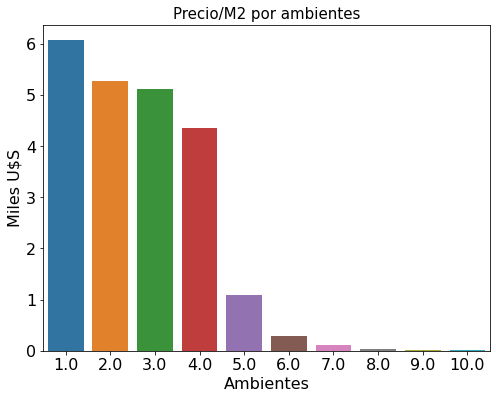

In [10]:
AMBIENTES= df.groupby('ambientes')['PRECIO_M2'].sum() * 1e-6
fig = plt.figure(figsize=(8,6))
sns.barplot(AMBIENTES.index , AMBIENTES.values)
plt.title('Precio/M2 por ambientes' ,size = 15)
plt.ylabel('Miles U$S')
plt.xlabel('Ambientes')
plt.show()

C:\Users\Usuario\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


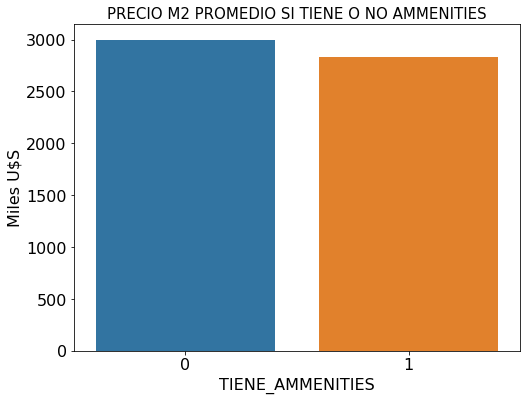

In [11]:
TIENE_AMMENITIES= df.groupby('TIENE_AMMENITIES')['PRECIO_M2'].mean()
fig = plt.figure(figsize=(8,6))
sns.barplot(TIENE_AMMENITIES.index , TIENE_AMMENITIES.values)
plt.title('PRECIO M2 PROMEDIO SI TIENE O NO AMMENITIES' ,size = 15)
plt.ylabel('Miles U$S')
plt.show()

C:\Users\Usuario\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


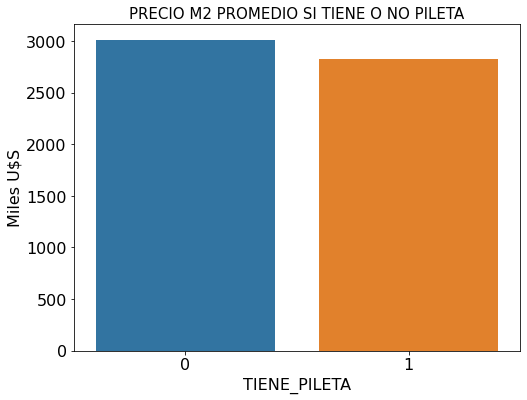

In [12]:
TIENE_PILETA= df.groupby('TIENE_PILETA')['PRECIO_M2'].mean()
fig = plt.figure(figsize=(8,6))
sns.barplot(TIENE_PILETA.index , TIENE_PILETA.values)
plt.title('PRECIO M2 PROMEDIO SI TIENE O NO PILETA' ,size = 15)
plt.ylabel('Miles U$S')
plt.show()

C:\Users\Usuario\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


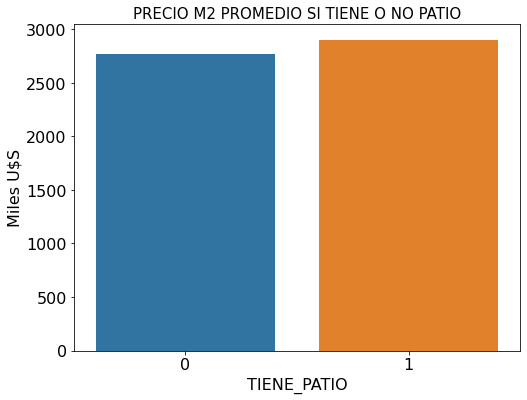

In [13]:
TIENE_PATIO= df.groupby('TIENE_PATIO')['PRECIO_M2'].mean()
fig = plt.figure(figsize=(8,6))
sns.barplot(TIENE_PATIO.index , TIENE_PATIO.values)
plt.title('PRECIO M2 PROMEDIO SI TIENE O NO PATIO' ,size = 15)
plt.ylabel('Miles U$S')
plt.show()

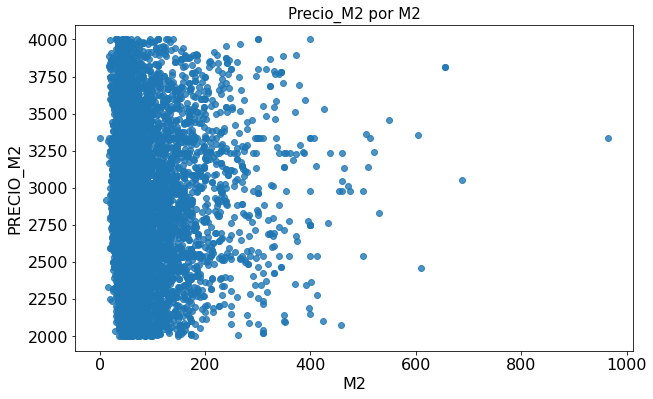

In [14]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['M2'] , df['PRECIO_M2'], cmap = 'summer' ,alpha = 0.8 )
plt.xlabel('M2')
plt.ylabel('PRECIO_M2')
# plt.colorbar(label = 'ambientes')
plt.title('Precio_M2 por M2',size = 15);

In [15]:
df.drop(df.query('M2 >= 250').index, axis = 0, inplace = True)

print(df.shape)

(7550, 22)


In [16]:
df.drop_duplicates(inplace=True)
print(df.shape)

(7260, 22)



 mu = 2878.57 and sigma = 471.54



C:\Users\Usuario\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


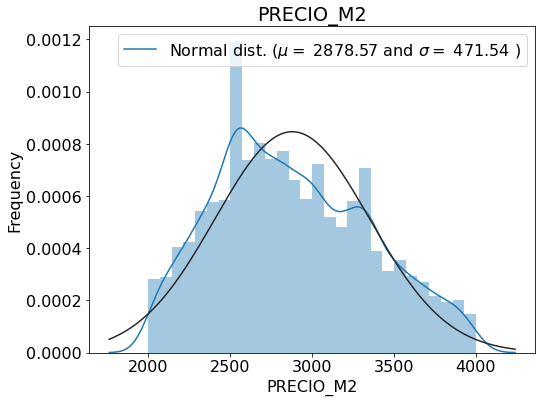

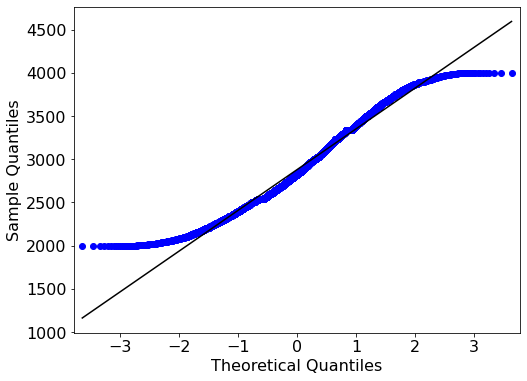

In [17]:
sns.distplot(df['PRECIO_M2'] , fit=norm);

(mu, sigma) = norm.fit(df['PRECIO_M2'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('PRECIO_M2')

fig, ax = plt.subplots(1)
#fig = plt.figure()
res = sm.ProbPlot(df['PRECIO_M2']).qqplot(line='s', ax=ax)
ax.get_lines()[1].set_color("black")
plt.show()

In [18]:
df['PRECIO_M2'].value_counts()

3337.95    153
2542.67    144
3000.00    107
2500.00     90
3237.18     57
          ... 
3366.67      1
2880.27      1
2492.54      1
2395.21      1
3767.12      1
Name: PRECIO_M2, Length: 3554, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13748\808614607.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[mask2]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13748\808614607.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[mask3]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13748\808614607.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[mask4]
C:\Users\Usuario\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 2878.45 and sigma = 478.82



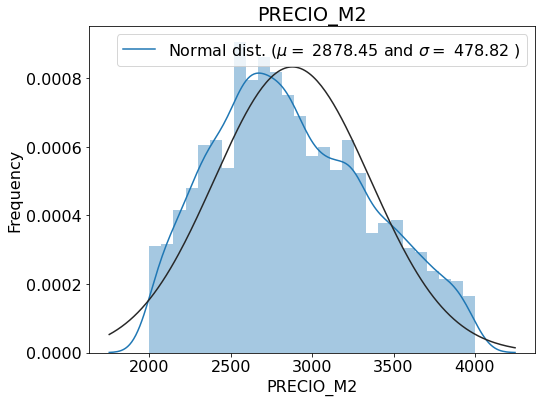

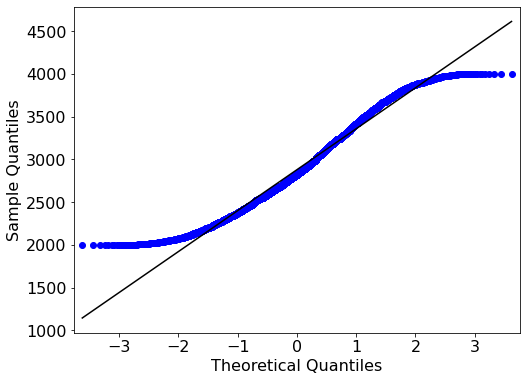

Index(['property_type', 'place_with_parent_names', 'ambientes', 'M2',
       'TIENE_PILETA', 'TIENE_PATIO', 'TIENE_AMMENITIES', 'PRECIO_M2', 'lat',
       'lon', 'Barrio_Norte', 'Belgrano', 'Coghlan', 'Colegiales', 'Palermo',
       'Palermo_Chico', 'Palermo_Hollywood', 'Palermo_Soho', 'Palermo_Viejo',
       'Recoleta', 'Saavedra', 'Villa_Urquiza', 'latlon'],
      dtype='object')

In [78]:
mask = df.PRECIO_M2 != 3337.95
mask2 = df.PRECIO_M2 != 2542.67
mask3 = df.PRECIO_M2 != 3000.00
mask4 = df.PRECIO_M2 != 2500.00
df2 = df[mask]
df2 = df2[mask2]
df2 = df2[mask3]
df2 = df2[mask4]
# print(df2.shape)
# df2.value_counts()

# print(df2.shape)
# print(df2.describe())

sns.distplot(df2['PRECIO_M2'] , fit=norm);

(mu, sigma) = norm.fit(df2['PRECIO_M2'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('PRECIO_M2')

fig, ax = plt.subplots(1)
#fig = plt.figure()
res = sm.ProbPlot(df2['PRECIO_M2']).qqplot(line='s', ax=ax)
ax.get_lines()[1].set_color("black")
plt.show()
df.columns

<AxesSubplot:>

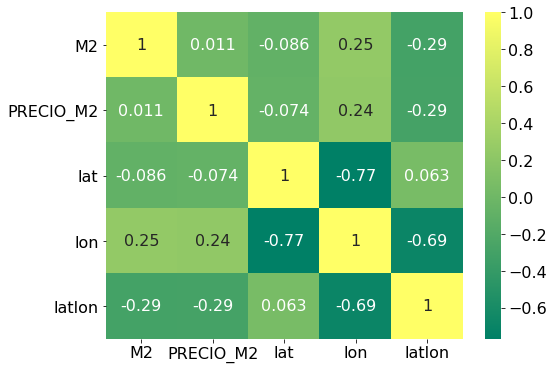

In [79]:
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr() ,annot=True,cmap='summer')

In [121]:
df['latlon']= df.lat*df.lon
df2 = df.loc[:,('TIENE_PATIO', 'TIENE_PILETA','ambientes', 'TIENE_AMMENITIES','PRECIO_M2','lat','lon','Barrio_Norte', 'Belgrano', 'Coghlan', 'Colegiales', 'Palermo',
       'Palermo_Chico', 'Palermo_Hollywood', 'Palermo_Soho', 'Palermo_Viejo',
       'Recoleta', 'Saavedra', 'Villa_Urquiza')]
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7260 entries, 1 to 10883
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TIENE_PATIO        7260 non-null   object 
 1   TIENE_PILETA       7260 non-null   object 
 2   ambientes          7260 non-null   object 
 3   TIENE_AMMENITIES   7260 non-null   object 
 4   PRECIO_M2          7260 non-null   float64
 5   lat                7260 non-null   float64
 6   lon                7260 non-null   float64
 7   Barrio_Norte       7260 non-null   object 
 8   Belgrano           7260 non-null   object 
 9   Coghlan            7260 non-null   object 
 10  Colegiales         7260 non-null   object 
 11  Palermo            7260 non-null   object 
 12  Palermo_Chico      7260 non-null   object 
 13  Palermo_Hollywood  7260 non-null   object 
 14  Palermo_Soho       7260 non-null   object 
 15  Palermo_Viejo      7260 non-null   object 
 16  Recoleta           7260

#ANALISIS DE FEATURES

Creamos variables dummies (todas menos M2) y creamos polinomios.

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
cat_col = df2.select_dtypes(include = 'object').columns
df2 = pd.get_dummies(df2 , cat_col ,drop_first=True)
y =df2.pop('PRECIO_M2')
X_train, X_test, y_train, y_test = train_test_split( df2 , y , test_size=0.2 , random_state=True)

In [123]:
X_train.shape

(5808, 26)

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly=poly_features.transform(X_test)
X_train_poly.shape

(5808, 377)

In [125]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_poly = std_scaler.fit_transform(X_train_poly)
X_test_poly = std_scaler.transform(X_test_poly)

In [126]:
##MODELADO

In [127]:
from sklearn.metrics import  mean_squared_error ,r2_score

lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_hat_train = lr1.predict(X_train)
print(f"R-Squared Score sin PolynomialFeatures ': {r2_score(y_train, y_hat_train)}")

R-Squared Score sin PolynomialFeatures ': 0.19902342922533423


In [128]:
lr2 = LinearRegression()
lr2.fit(X_train_poly, y_train)
y_hat_train = lr2.predict(X_train_poly)
print(f"R-Squared Score con PolynomialFeatures': {r2_score(y_train, y_hat_train)}")

R-Squared Score con PolynomialFeatures': 0.27613306265537807


In [129]:
from sklearn.linear_model import Lasso , Ridge ,ElasticNet
from sklearn.model_selection import GridSearchCV , learning_curve

RD =Ridge()
RD_param_grid = {'alpha' : [ 12,13,14,15,16,17,18,19,20,23]
                }

gsRD = GridSearchCV(RD,param_grid = RD_param_grid, cv=5,scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsRD.fit(X_train_poly, y_train)
RD_best = gsRD.best_estimator_
RD_best

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.5s finished


Ridge(alpha=23)

In [130]:
las =Lasso()
las_param_grid = {'alpha' : [ 0,0.000001,0.000003,0.000005,0.000007,0.00001,0.00003,0.00005,0.00007,0.0001,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.005,0.007,0.009,0.01,0.02,0.03,0.05]
                }
gslas = GridSearchCV(las,param_grid = las_param_grid, cv=5,scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gslas.fit(X_train_poly, y_train)
las_best = gslas.best_estimator_
las_best

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 115 out of 115 | elapsed:  2.5min finished
C:\Users\Usuario\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44291608.38907421, tolerance: 130128.75305433413
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.05)

In [131]:
def learning_curves(models, X_train, y_train):
    for model in models:
        plt.figure(figsize=(8,6))
        train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train,
        cv = 3, scoring = 'neg_mean_squared_error')
        train_scores_mean = -train_scores.mean(axis = 1)
        validation_scores_mean = -validation_scores.mean(axis = 1)

        plt.plot(train_sizes, train_scores_mean, label = 'Training error')
        plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

        plt.ylabel('MSE', fontsize = 14)
        plt.xlabel('Training set size', fontsize = 14)
        title = 'Learning curves for a ' + str(model).split('(')[0] + ' model'
        plt.title(title, fontsize = 18, y = 1.03)
        plt.legend()
        plt.show()


In [132]:
from time import time
start = time()
lr1.fit(X_train, y_train)
train_time = time() - start
start = time()
y_pred = lr1.predict(X_test)
predict_time = time()-start   
start = time()
y_pred_train = lr1.predict(X_train)
predict_time = time()-start  
print(lr1)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tMean absolute error:", mean_squared_error(y_test, y_pred))
print("\tR2 score train:", r2_score(y_train, y_pred_train))
print("\tR2 score test:", r2_score(y_test, y_pred))
print()

for model in [lr2, las_best ,RD_best ]:
    start = time()
    model.fit(X_train_poly, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test_poly)
    predict_time = time()-start   
    start = time()
    y_pred_train = model.predict(X_train_poly)
    predict_time = time()-start  
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean absolute error:", mean_squared_error(y_test, y_pred))
    print("\tR2 score train:", r2_score(y_train, y_pred_train))
    print("\tR2 score test:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.008s
	Prediction time: 0.008s
	Mean absolute error: 174694.23879989304
	R2 score train: 0.19902342922533423
	R2 score test: 0.1893820925411187

LinearRegression()
	Training time: 0.184s
	Prediction time: 0.008s
	Mean absolute error: 1.769783879013883e+20
	R2 score train: 0.27613306265537807
	R2 score test: -821216838354930.8

Lasso(alpha=0.05)
	Training time: 1.976s
	Prediction time: 0.008s
	Mean absolute error: 171737.35138900546
	R2 score train: 0.24307195625148736
	R2 score test: 0.20310267028925366

Ridge(alpha=23)
	Training time: 0.032s
	Prediction time: 0.008s
	Mean absolute error: 171469.1207678739
	R2 score train: 0.2430072566729562
	R2 score test: 0.20434731662854788



C:\Users\Usuario\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44291608.38907421, tolerance: 130128.75305433413
  model = cd_fast.enet_coordinate_descent(


In [133]:
X_train_sm = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train_sm,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              PRECIO_M2   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     57.47
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          9.68e-256
Time:                        20:51:22   Log-Likelihood:                -43373.
No. Observations:                5808   AIC:                         8.680e+04
Df Residuals:                    5782   BIC:                         8.697e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.915e+05   5